#### Importación de librerías y carga de datos

In [609]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import time

In [610]:
df = pd.read_csv('dataset_SCL.csv')

c:\Users\sebalopsa\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

#### Observaciones preliminares

Un análisis preliminar muestra que el dataset tiene un tamaño de 68.206 viajes, los cuales fueron llevados a cabo durante el año 2017, con un primer vuelo programado para el 1 de enero de 2017 a las 00:15:00 hrs y un último vuelo programado para el 31 de diciembre de 2021 a las 23:55:00 hrs. Sin embargo, como muestra la siguiente celda, la fecha y hora de operación de estos dos vuelos son distintas a las programadas.

In [611]:
print('Cantidad de vuelos: {}'.format(len(df)))
print('Fecha programada primer vuelo: {}'.format(df['Fecha-I'].min()))
print('Fecha óperación primer vuelo: {}'.format(df['Fecha-O'].min()))
print('Fecha programada último vuelo: {}'.format(df['Fecha-I'].max()))
print('Fecha óperación último vuelo: {}'.format(df['Fecha-O'].max()))

Cantidad de vuelos: 68206
Fecha programada primer vuelo: 2017-01-01 00:15:00
Fecha óperación primer vuelo: 2017-01-01 00:04:00
Fecha programada último vuelo: 2017-12-31 23:55:00
Fecha óperación último vuelo: 2018-01-01 00:12:00


Llama la atención que en el primer vuelo operado sale 11 minutos antes que la hora programada. La siguiente celda muestra que se trata del mismo vuelo y expone los detalles de éste.

In [612]:
df.sort_values(by=['Fecha-I']).iloc[0]

Fecha-I      2017-01-01 00:15:00
Vlo-I                         11
Ori-I                       SCEL
Des-I                       MMMX
Emp-I                        AMX
Fecha-O      2017-01-01 00:04:00
Vlo-O                         11
Ori-O                       SCEL
Des-O                       MMMX
Emp-O                        AMX
DIA                            1
MES                            1
AÑO                         2017
DIANOM                   Domingo
TIPOVUELO                      I
OPERA                 Aeromexico
SIGLAORI                Santiago
SIGLADES        Ciudad de Mexico
Name: 169, dtype: object

En cuanto a las ciudades de origen, solo hay una y es Santiago (Código SCEL), esto queda claro al observar los valores únicos de las variables 'Ori-I', 'Ori-O' y 'SIGLAORI'.

In [613]:
print('Aeropuertos de origen programado: {}, {}'.format(len(df['Ori-I'].unique()),df['Ori-I'].unique()[0]))
print('Aeropuertos de origen operado: {}, {}'.format(len(df['Ori-O'].unique()),df['Ori-I'].unique()[0]))
print('Ciudades de origen: {}, {}'.format(len(df['SIGLAORI'].unique()),df['SIGLAORI'].unique()[0]))

Aeropuertos de origen programado: 1, SCEL
Aeropuertos de origen operado: 1, SCEL
Ciudades de origen: 1, Santiago


Respecto a las ciudades de destino, hay 64 códigos programados, 63 códigos operados y 62 ciudades de destino (variable 'SIGLADES'). Los primeros dos números permiten concluir que hay un aeropuerto de destino que estaba programado y al cual no se arribó en ningun vuelo. Por otra parte, los 62 valores de 'SIGLADES' sugiere que hay una o más ciudades que tienen más de 1 aeropuerto (cada uno con su respectivo código).

In [614]:
print('Aeropuertos de destino programado: {}'.format(len(df['Des-I'].unique())))
print('Aeropuertos de destino operado: {}'.format(len(df['Des-O'].unique())))
print('Ciudades de destino: {}'.format(len(df['SIGLADES'].unique())))

Aeropuertos de destino programado: 64
Aeropuertos de destino operado: 63
Ciudades de destino: 62


Los vuelos que no llegaron a su destino programado son 28. A continuación se toma una muestra de estos 28 vuelos.

In [615]:
df[df['Des-I']!=df['Des-O']].sample()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
67599,2017-12-01 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-01 11:22:00,7811.0,SCEL,SABE,DSM,1,12,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires


Respecto a las empresas operadoras, son 23, sin embargo los códigos de aerolineas tanto programado como operado son más de 23. Para dilucidar esto se necesitaría tener más información sobre cada una de estas variables, sin embargo como presunción, seguramente los códigos remiten a filiales mientras que la variable 'OPERA' se refiere a la empresa matríz. 

In [616]:
print('Aerolíneas operadoras: {}'.format(len(df['OPERA'].unique())))
print('Códigos aerolíneas vuelo programado: {}'.format(len(df['Emp-I'].unique())))
print('Códigos aerolíneas vuelo operado: {}'.format(len(df['Emp-O'].unique())))

Aerolíneas operadoras: 23
Códigos aerolíneas vuelo programado: 30
Códigos aerolíneas vuelo operado: 32


En relación a las variables de número de vuelo (Vlo), en un principio se pensó que se referen a una ruta específica operada por una aerolínea específica. Sin embargo hay casos en los que se mantienen estas variables y el número de vuelo cambia ('Vlo-I' != 'Vlo-O'). Esto lleva a pensar estas variables refieren a una tripulación o bien a una máquina específica.

In [617]:
print('Números de vuelos programados: {}'.format(len(df['Vlo-I'].unique())))
print('Números de vuelos operados: {}'.format(len(df['Vlo-O'].unique())))
print('Vuelos cuyo números de vuelo cambió: {}'.format(len(df[df['Vlo-I']!=df['Vlo-O']])))

Números de vuelos programados: 750
Números de vuelos operados: 867
Vuelos cuyo números de vuelo cambió: 1850


La siguiente celda muestra un ejemplo de un vuelo cuyo número de vuelo programado fue distinto al número de vuelo operado.

In [618]:
df[df['Vlo-I']!=df['Vlo-O']].sample()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
65350,2017-12-29 07:32:00,231,SCEL,SCQP,LAN,2017-12-29 07:36:00,231.0,SCEL,SCQP,LXP,29,12,2017,Viernes,N,Grupo LATAM,Santiago,Temuco


#### Distribución de datos 

A continuación se analiza la distribución de los datos en función de las variables de interés originales.

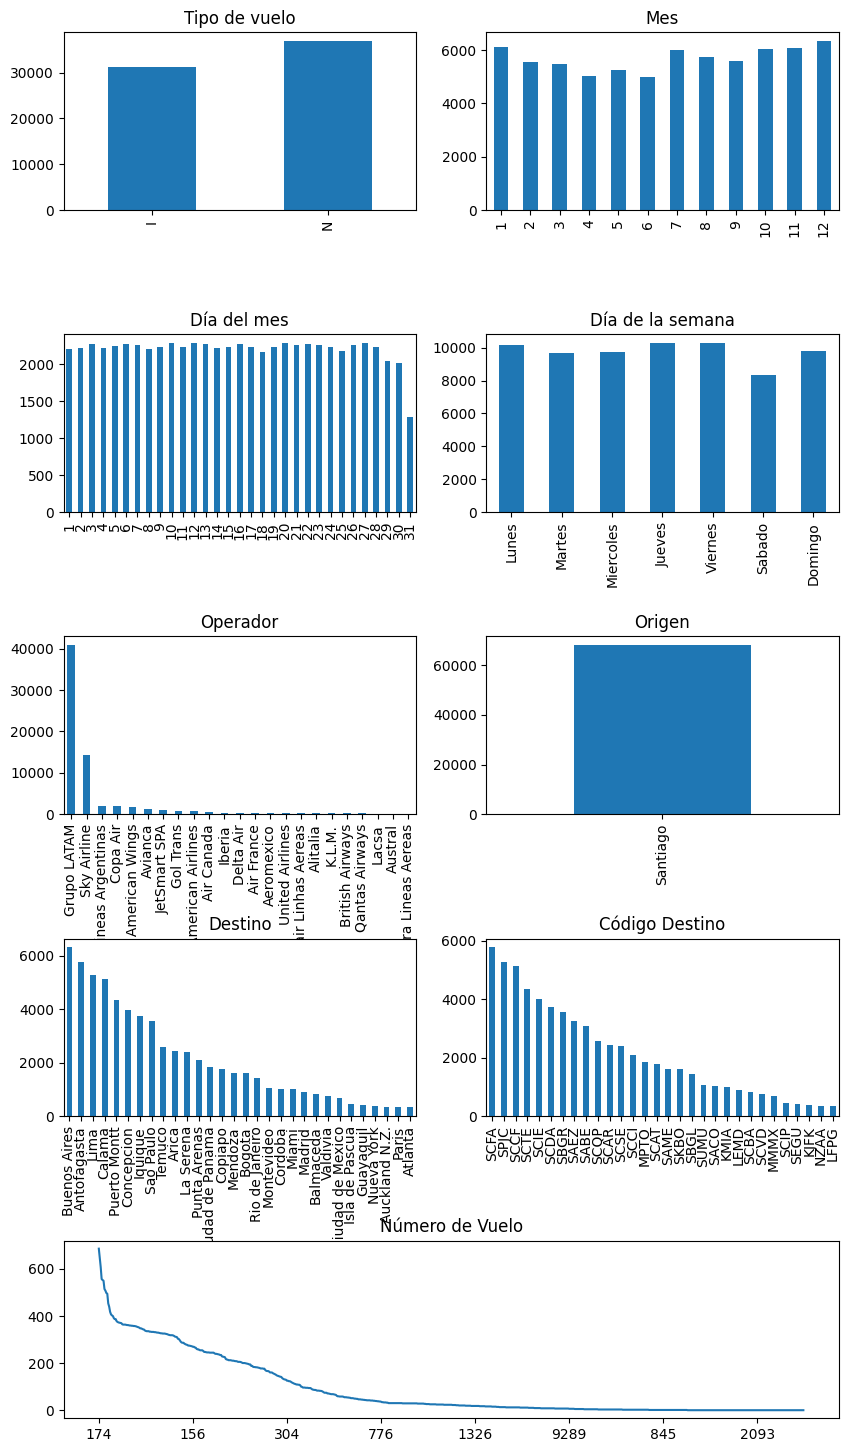

In [619]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(10,18)
plt.subplots_adjust(hspace = .7)
df['TIPOVUELO'].value_counts().sort_index().plot(kind='bar',ax=ax[0,0], title="Tipo de vuelo")
df['MES'].value_counts().sort_index().plot(kind='bar',ax=ax[0,1], title="Mes")
df['DIA'].value_counts().sort_index().plot(kind='bar',ax=ax[1,0], title="Día del mes")
week_days = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"] 
df['DIANOM'].value_counts().loc[week_days].plot(kind='bar',ax=ax[1,1], title="Día de la semana")
df['OPERA'].value_counts().plot(kind='bar',ax=ax[2,0], title="Operador")
df['SIGLAORI'].value_counts().plot(kind='bar',ax=ax[2,1], title="Origen")
df['SIGLADES'].value_counts().head(30).plot(kind='bar',ax=ax[3,0], title="Destino")
df['Des-I'].value_counts().head(30).plot(kind='bar',ax=ax[3,1], title="Código Destino")
df['Vlo-I'].value_counts().plot(kind='line',ax=plt.subplot2grid([5,2],[4,0], colspan=2) , title="Número de Vuelo")

plt.show()

A partir de los gráficos anteriores, se puede comentar lo siguiente:

1) Existe una leve mayoría de vuelos nacionales.
2) Durante los meses de invierno se tiende a volar menos.
3) El día sábado se vuela levemente menos que los otros días de la semana.
4) La aerolínea que más vuelos hace desde Santiago es Grupo LATAM (60%) seguida por Sky Airline(21%).  
5) La mayor cantidad de vuelos se realizan a Buenos Aires, Lima y ciudades de Chile.
6) Existen unos pocos números de vuelos que se repiten bastante.

In [620]:
pctg_latam = len(df[df['OPERA']=='Grupo LATAM']) / len(df) * 100
pctg_sky = len(df[df['OPERA']=='Sky Airline']) / len(df) * 100
print('Porcentaje Latam: ',pctg_latam)
print('Porcentaje Sky: ',pctg_sky)

Porcentaje Latam:  59.95366976512331
Porcentaje Sky:  20.962965135032107


### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

A continuación se obtienen las variables adicionales 'temporada_alta', 'dif_min', 'atraso_15' y 'periodo_dia'.

In [621]:
def is_summer(date):
    return (date >='2017-12-15') & (date<='2017-3-3')

def is_winter(date):
    return (date >='2017-07-15') & (date<='2017-07-31')

def is_september(date):
    return (date >='2017-09-11') & (date<='2017-09-31')

def is_morning(date):
    return (pd.to_datetime(date).dt.time >= time(5,0)) & (pd.to_datetime(date).dt.time <= time(11,59))

def is_afternoon(date):
    return (pd.to_datetime(date).dt.time >= time(12,0)) & (pd.to_datetime(date).dt.time <= time(18,59))

def is_night(date):
    return (pd.to_datetime(date).dt.time >= time(19,0)) | (pd.to_datetime(date).dt.time <= time(4,59))

def add_syntethic_features(df):
    df2 = df.copy()
    df2['temporada_alta'] = np.where(is_summer(df['Fecha-I']) | is_winter(df['Fecha-I']) | is_september(df['Fecha-I']), 1, 0)
    df2['dif_min'] = (pd.to_datetime(df['Fecha-O']) - pd.to_datetime(df['Fecha-I'])).astype('timedelta64[m]')
    df2['atraso_15'] = np.where(df2['dif_min']>15, 1, 0)
    df2.loc[is_morning(df['Fecha-I']), 'periodo_dia'] = 'mañana'
    df2.loc[is_afternoon(df['Fecha-I']), 'periodo_dia'] = 'tarde'
    df2.loc[is_night(df['Fecha-I']), 'periodo_dia'] = 'noche'

    return df2

df_synthetic = add_syntethic_features(df)

En la siguiente celda se grafica la distribución de las nuevas variables, en gráficos de torta.

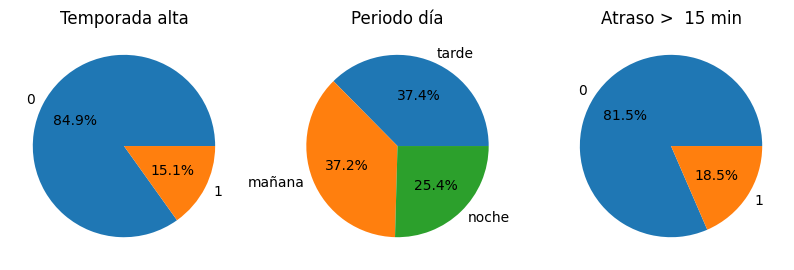

In [622]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,3)
plt.subplots_adjust(hspace = 1)

df_synthetic['temporada_alta'].value_counts().plot(kind='pie', ylabel='',autopct='%1.1f%%', ax=ax[0],title="Temporada alta")
df_synthetic['periodo_dia'].value_counts().plot(kind='pie', ylabel='',autopct='%1.1f%%',ax= ax[1],title="Periodo día")
df_synthetic['atraso_15'].value_counts().plot(kind='pie', ylabel='',autopct='%1.1f%%',ax= ax[2],title="Atraso >  15 min")

plt.show()

Finalmente se guarda el dataframe resultante en el archivo synthetic_features.csv.

In [623]:
df_synthetic.to_csv('synthetic_features.csv')

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?


A continuación se grafica la tasa de atraso de acuerdo a las variables 'SIGLADES', 'OPERA', 'MES', 'DIA', 'TEMPORADA' y 'TIPOVUELO'. 

In [624]:
df_synthetic['TEMPORADA'] = np.where(df_synthetic['temporada_alta']==1,'alta', 'baja')
df_synthetic['TIPOVUELO2'] = np.where(df_synthetic['TIPOVUELO']=='I','Internacional', 'Nacional')

def get_delay_rate(var):
    return 100*pd.crosstab(df_synthetic[var],df_synthetic.atraso_15,normalize = 'index')[1]


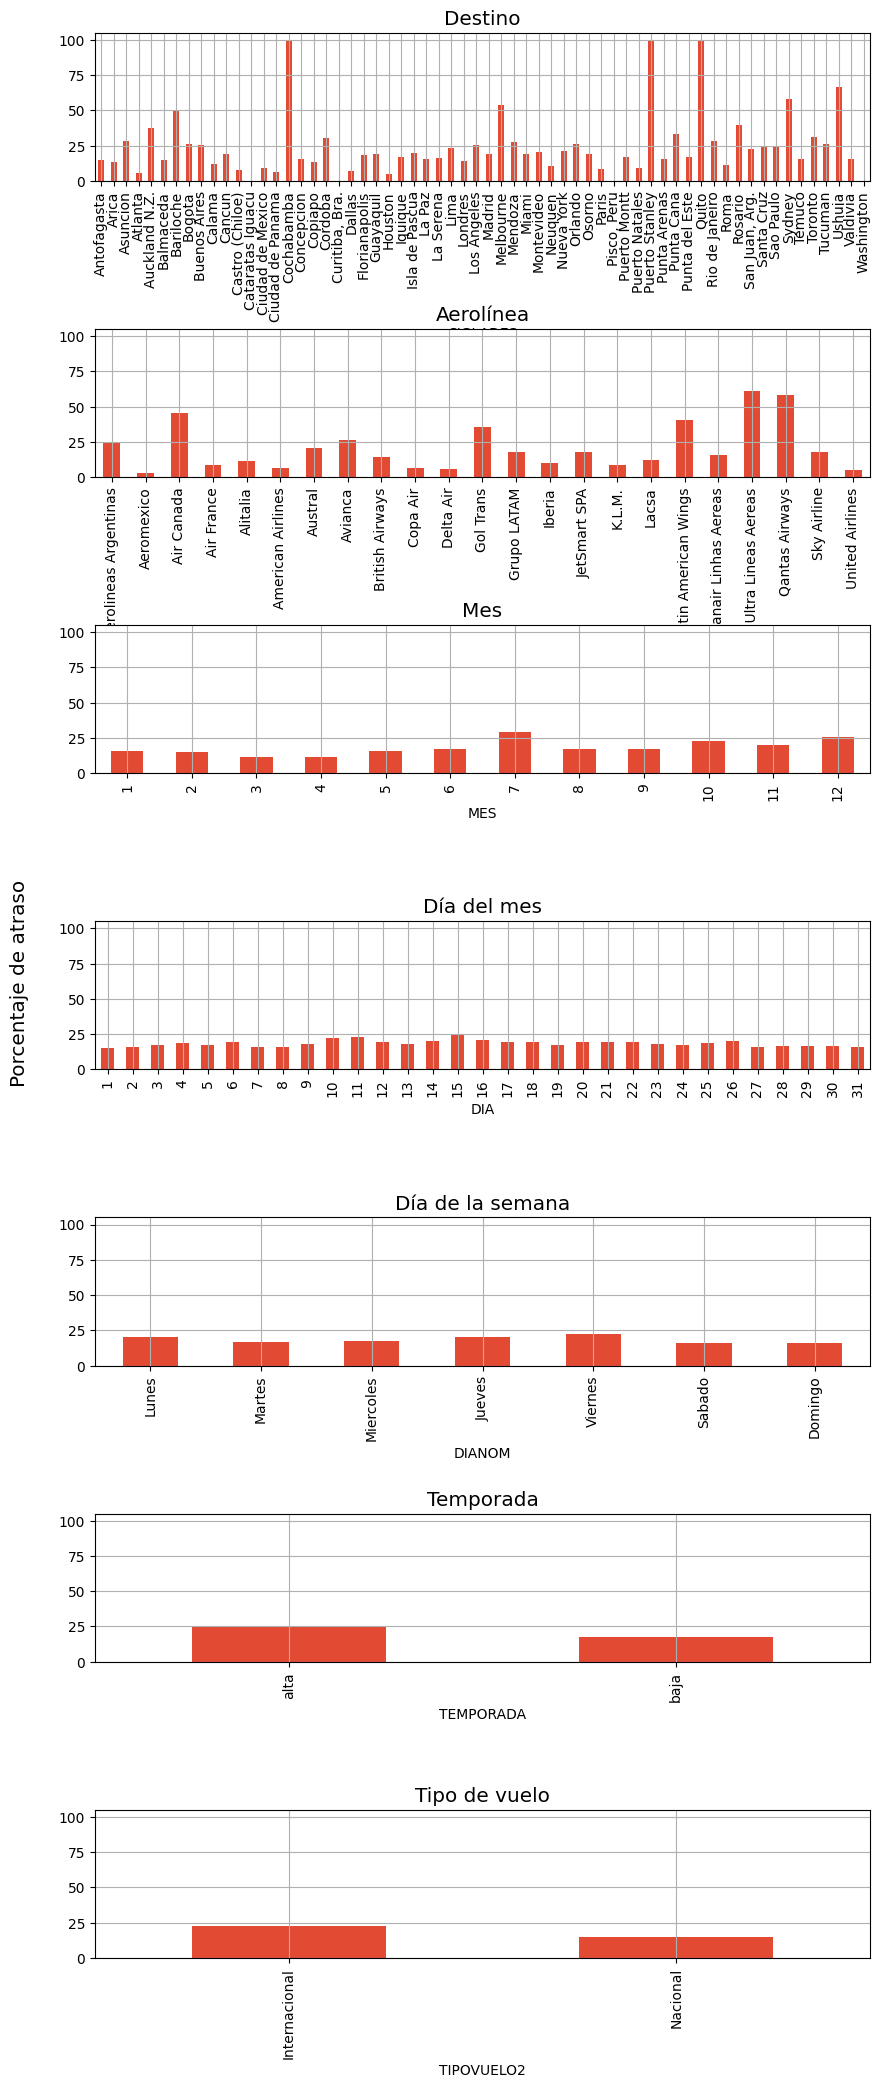

In [625]:
fig, ax = plt.subplots(7,1, sharey=True,)
fig.set_size_inches(10,25)
plt.subplots_adjust(hspace = 1)
plt.style.use('ggplot')
fig.text(0.04, 0.5, 'Porcentaje de atraso',  fontsize='x-large',va='center', rotation='vertical')

get_delay_rate('SIGLADES').plot(kind='bar', ax=ax[0],title="Destino")
get_delay_rate('OPERA').plot(kind='bar', ax=ax[1],title="Aerolínea")
get_delay_rate('MES').plot(kind='bar', ax=ax[2],title="Mes")
get_delay_rate('DIA').plot(kind='bar', ax=ax[3],title="Día del mes")
week_days = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"] 
# df['DIANOM'].value_counts().loc[week_days].plot(kind='bar',ax=ax[1,1], title="Día de la semana")
get_delay_rate('DIANOM').loc[week_days].plot(kind='bar', ax=ax[4],title="Día de la semana")
get_delay_rate('TEMPORADA').plot(kind='bar', ax=ax[5],title="Temporada")
get_delay_rate('TIPOVUELO2').plot(kind='bar', ax=ax[6],title="Tipo de vuelo")

plt.show()

De acuerdo a los resultados visuales, es de esperar que las variables que más inciden en la tasa de atraso son las que muestran una mayor variabilidad, en este caso: el destino, la aerolínea y el mes del año. Además, es natural pensar que el destino y la aerolínea tienen un alto grado de correlación debido a que las diferentes aerolíneas se concentrarían en un número acotado de destinos.

Respecto al mes del año, al parecer el factor causal sería el clima en la ciudad de origen, ya que a simple vista el mayor porcentaje de atrasos se dan en julio, mes de invierno en Santiago.

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.


En esta fase se entrenará el modelo Random Forest Classifier, ya que es uno de más utilizados para este tipo de problemas de predicción con variables categóricas, entregando resultados razonables sin gastar demasiado esfuerzo en la preparación de los datos. Además, dependiendo de la precisión de la primera predicción, es posible que se pueda optimizar trabajando en la hiperparametrización en vez de tener explorar otros modelos. 

In [626]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split

A continuación se codifican las variables categóricas con el método Label Encoder. En este caso se prefirió usar por sobre One Hot Encoder debido a que este último crearía demasiadas variables dummy y sería dificil trazar la importancia de las variables originales luego del entrenamiento.

In [627]:
le = LabelEncoder()
def add_encoded_features(df, features):
    for feature in features:
        df[feature] = le.fit_transform(df_synthetic[feature].values)
    return df

En la siguiente celda se entrena el modelo Random Forest Classifier separando previamente los datos de entrenamiento de los de prueba. Como variable dependiente 'y' se utilizó la variable dicotómica 'atraso_15' la cual se toma como criterio para decidir si el vuelo se considera con atraso o no, de tal forma que el modelo entrenado permitirá obtener la probabilidad de que un vuelo se atrase en más de 15 minutos, dados los valores de las variables 'SIGLADES', 'OPERA', 'MES', 'DIA', 'DIANOM', 'TEMPORADA' y 'TIPOVUELO'.

In [628]:
model = RandomForestClassifier()

features_to_encode = ['SIGLADES', 'OPERA', 'DIANOM', 'TEMPORADA', 'TIPOVUELO2']
X = pd.concat([df_synthetic[['MES', 'DIA']], add_encoded_features(pd.DataFrame(), features_to_encode)], axis=1)
y = df_synthetic['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
model.fit(X_train,y_train)


RandomForestClassifier()

### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

La siguiente celda muestra la precisión del modelo calculada sobre los datos de prueba que corresponden al 25% de los datos originales. El resultado, utilizando los parametros por defecto del algoritmo (100 árboles de decisión, criterio de gini, sin límite de profundidad, etc) es de un 79% aproximadamente. 

Esta métrica se utilizó debido a que entrega una noción del comportamiento global del modelo. Sin embargo, es necesario tener en cuenta que en este valor puede esconder ciertos problemas específicos. 

En cuanto al uso de este algoritmo en Random Forest, la respuesta se encuentra en la introducción a la parte 4, en donde se entrena el modelo.

In [630]:
y_pred_test = model.predict(X_test)
print('Precisión del modelo: ',accuracy_score(y_test, y_pred_test))

Precisión del modelo:  0.7875322542810228


La siguiente métrica (matríz de confusión) permite observar más de cerca la calidad del modelo, al comparar los errores en cada una de las decisiones finales. Esta métrica suele acompañar este algoritmo, por lo que es utilizada, además, proporciona información más específica, por ejemplo, en este caso se evidencia un sesgo en las decisiones del modelo, ya que acierta ampliamente en los resultados cuando no hay atraso, pero falla bastante cuando el resultado muestra que existe atraso, generando gran cantidad de falsos positivos. La ponderación de estos valores entrega la precisión global del modelo.

In [632]:
confusion_matrix(y_test, y_pred_test)

array([[12769,  1129],
       [ 2494,   660]], dtype=int64)

In [633]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     13898
           1       0.37      0.21      0.27      3154

    accuracy                           0.79     17052
   macro avg       0.60      0.56      0.57     17052
weighted avg       0.75      0.79      0.76     17052



El siguiente gráfico muestra las variables más importantes en la determinación de la probabilidad de atraso. En primer lugar aparece la ciudad de destino tal como era de suponer de acuerdo al análisis previo, sin embargo la segunda variable más importante es el día del mes, lo cual resulta sorpresivo.

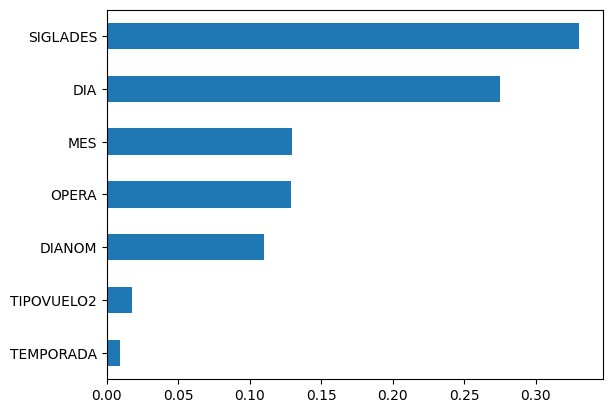

In [634]:
plt.style.use('default')

feature_names = list(X.columns.values)
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values()
forest_importances.plot(kind='barh')
plt.show()

Finalmente, para mejorar la performance del modelo es necesario comenzar un proceso de hiperparametrización, es decir, modificar los parámetros del entrenamiento con tal de alcanzar un resultado óptimo. 
Este proceso se puede llevar a cabo de forma manual o de forma automatizada, esto es, generando un algoritmo de "fuerza bruta" o un algoritmo que implemente una heurística para acelerar el proceso, o utilizando otro modelo de ML utilizando como input los posibles valores de los hiperparámetros a optimizar. Esta última estrategia la considero más adecuada, sin embargo requiere precisión en la determinación de los rangos de valores inputs para no malgastar poder de computación, lo cual se logra a partir de una profunda investigación sobre las bases teóricas del modelo. 